In [570]:
import requests, pandas as pd, numpy as np, datetime as dt, warnings, matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import math
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [571]:
start_date = dt.datetime(2022,3,13)

In [572]:
# api_key has been changed, please use your own api_key...
api_key = '42fbda055d8447db0c5397d3b36'
symbol = 'AAPL'
interval = '1day'
order = 'asc'

In [573]:
end_date = start_date
start_date = end_date - dt.timedelta(days=365)

In [574]:
api_url = f'https://api.twelvedata.com/time_series?symbol={symbol}&interval={interval}&start_date={start_date}&end_date={end_date}&order={order}&apikey={api_key}'

In [575]:
data = requests.get(api_url).json()

In [576]:
data.keys()

dict_keys(['meta', 'values', 'status'])

In [577]:
df = pd.DataFrame(data['values'])

In [578]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  252 non-null    object
 1   open      252 non-null    object
 2   high      252 non-null    object
 3   low       252 non-null    object
 4   close     252 non-null    object
 5   volume    252 non-null    object
dtypes: object(6)
memory usage: 11.9+ KB


In [579]:
df

,datetime,open,high,low,close,volume
0,2021-03-15,121.41000,124.00000,120.42000,123.99000,92403800
1,2021-03-16,125.70000,127.22000,124.72000,125.57000,115227900
2,2021-03-17,124.05000,125.86000,122.34000,124.76000,111932600
3,2021-03-18,122.88000,123.18000,120.32000,120.53000,121229700
4,2021-03-19,119.90000,121.43000,119.68000,119.99000,185549500
...,...,...,...,...,...,...
247,2022-03-07,163.36000,165.02000,159.03999,159.30000,96418800
248,2022-03-08,158.82001,162.88000,155.80000,157.44000,131148300
249,2022-03-09,161.48000,163.41000,159.41000,162.95000,91454900
250,2022-03-10,160.20000,160.39000,155.98000,158.52000,105342000


In [580]:
df = df.set_index('datetime')

In [581]:
df.head()

,open,high,low,close,volume
datetime,,,,,
2021-03-15,121.41000,124.00000,120.42000,123.99000,92403800
2021-03-16,125.70000,127.22000,124.72000,125.57000,115227900
2021-03-17,124.05000,125.86000,122.34000,124.76000,111932600
2021-03-18,122.88000,123.18000,120.32000,120.53000,121229700
2021-03-19,119.90000,121.43000,119.68000,119.99000,185549500


In [582]:
df['close'] = df['close'].astype(float,errors='raise')

In [583]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2021-03-15 to 2022-03-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    252 non-null    object 
 1   high    252 non-null    object 
 2   low     252 non-null    object 
 3   close   252 non-null    float64
 4   volume  252 non-null    object 
dtypes: float64(1), object(4)
memory usage: 11.8+ KB


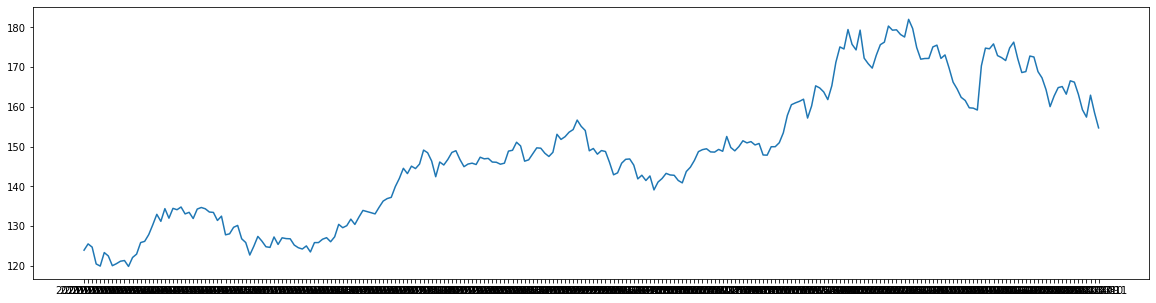

In [584]:
plt.figure(figsize=(20,5))
plt.plot(df.index,df['close'])
plt.show()

In [585]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    adftest = adfuller(dataset,autolag='AIC')
    print("1. ADF : ",adftest[0])
    print("2. p-value : ",adftest[1])
    print("3. number of lags : ",adftest[3])
    print("4. number of observations used for adf regression and critical values calculations : ",adftest[3])
    print("5. critical values : ")
    for key, val in adftest[4].items():
        print(" ",key, ":", val)

In [586]:
ad_test(df['close'])

1. ADF :  -1.5415424629163963
2. p-value :  0.5128700191628845
3. number of lags :  251
4. number of observations used for adf regression and critical values calculations :  251
5. critical values : 
  1% : -3.4566744514553016
  5% : -2.8731248767783426
  10% : -2.5729436702592023


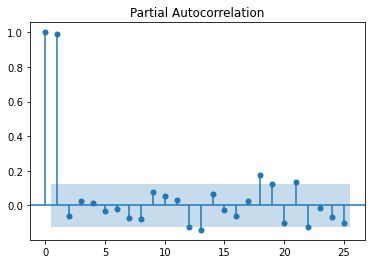

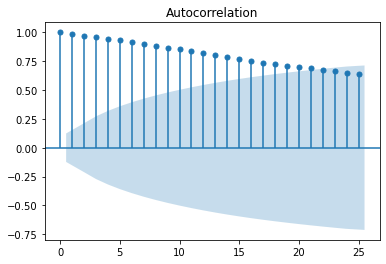

In [618]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf = plot_pacf(df['close'],lags=25)
acf = plot_acf(df['close'],lags=25)

In [587]:
split = int(len(df)*0.8)
train = list(df[:split]['close'])
test = list(df[split:]['close'])

In [588]:
len(test)

51

In [589]:
len(train)

201

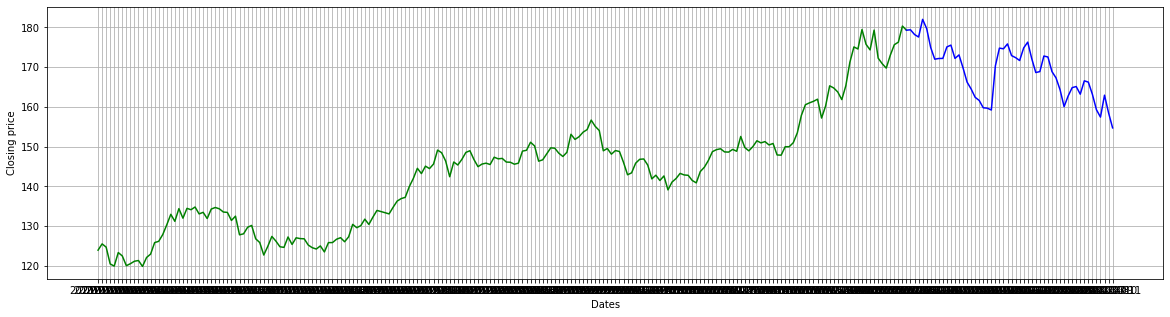

In [590]:
plt.figure(figsize=(20,5))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing price')
plt.plot(df[:split]['close'],'green',label='Train_data')
plt.plot(df[split-1:]['close'],'blue',label='test_data')

In [591]:
autoarima = auto_arima(df['close'],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1137.769, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1136.501, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1137.558, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1137.402, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1135.205, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1139.087, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.541 seconds


In [627]:
model_ex = ARIMA(df['close'],order=(2,1,0))
r = model_ex.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                  251
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -565.000
Method:                       css-mle   S.D. of innovations              2.298
Date:                Mon, 14 Mar 2022   AIC                           1137.999
Time:                        19:18:44   BIC                           1152.101
Sample:                             1   HQIC                          1143.674
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1243      0.143      0.869      0.385      -0.156       0.405
ar.L1.D.close     0.0655      0.063      1.036      0.300      -0.058       0.189
ar.L2.D.close    -0.0795      0.064     -1.250      0.211      -0.204       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.4118           -3.5233j            3.5473           -0.2315
AR.2            0.4118           +3.5233j            3.5473            0.2315
-----------------------------------------------------------------------------
"""

In [592]:
model_predictions = []
numberof_test_observations = len(test)

In [593]:
for i in range(numberof_test_observations):
    model = ARIMA(train,order=(0,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat =  list(output[0])[0]
    model_predictions.append(yhat)
    actual_test_value = test[i]
    train.append(actual_test_value)

In [594]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  250
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -563.050
Method:                           css   S.D. of innovations              2.301
Date:                Mon, 14 Mar 2022   AIC                           1130.100
Time:                        12:55:27   BIC                           1137.143
Sample:                             1   HQIC                          1132.935
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1381      0.146      0.949      0.343      -0.147       0.423


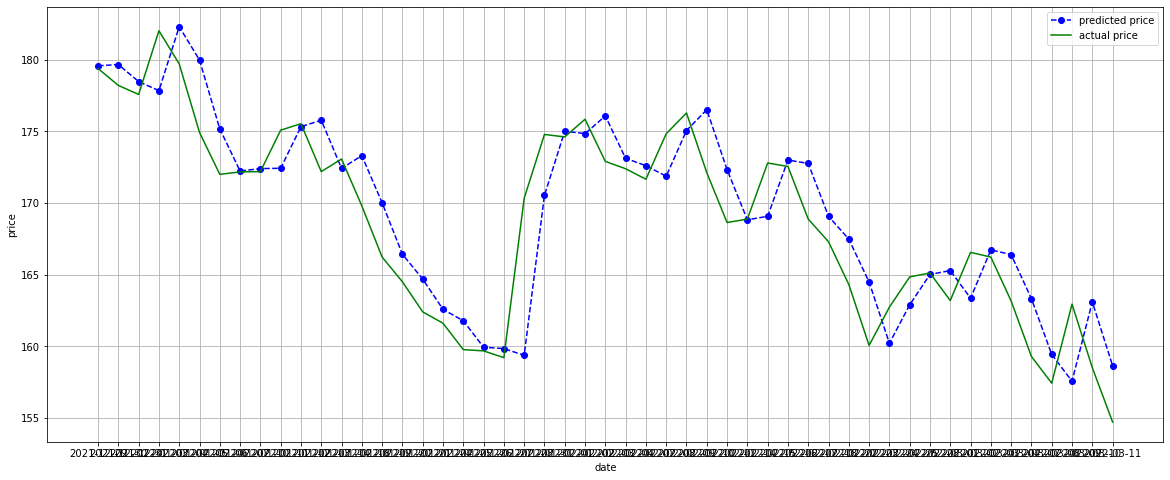

In [595]:
plt.figure(figsize=(20,8))
plt.grid(True)
date_range = df[split:].index
plt.plot(date_range,model_predictions,color='blue',marker='o',linestyle='dashed',label='predicted price')
plt.plot(date_range,test,color='green',label='actual price')
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.show()

In [596]:
mean_abs_percentage_error = np.mean(np.abs(np.array(model_predictions) - np.array(test))/np.abs(test))
print('MAPE : ' +str(mean_abs_percentage_error))

MAPE : 0.014577692148830706


In [614]:
test1 = df[split:]['close']
test1.mean() 

168.84803960784316

In [619]:
from sklearn.metrics import mean_squared_error
from math import sqrt 
rmse = sqrt(mean_squared_error(model_predictions,test))
print(rmse)

3.1326591939813677
